In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tune import SQLTuner

sqt = SQLTuner()

# Retrieve Training Logs

In [7]:
with open("training_logs.txt", "r") as f:
    text = f.read()

parsed_data = SQLTuner.parse_training_info(text)
for epoch, data in parsed_data.items():
    print(f"Epoch {epoch}:")
    for key, value in data.items():
        print(f"  {key}: {value}")

Epoch 0:
  steps: {0: 2.839599370956421, 1: 2.7988884449005127, 2: 2.3171210289001465, 3: 2.1340174674987793, 4: 2.056297779083252, 5: 1.7970514297485352, 6: 1.7931442260742188, 7: 1.6102008819580078, 8: 1.5521867275238037, 9: 1.3762695789337158, 10: 1.2254841327667236, 11: 1.1358281373977661, 12: 0.9283491373062134, 13: 1.1826101541519165, 14: 0.9248087406158447, 15: 0.8667495250701904, 16: 0.7657086253166199, 17: 1.0614949464797974, 18: 0.6322551965713501, 19: 0.5778215527534485, 20: 0.7495368719100952, 21: 0.7325270771980286, 22: 0.6096367239952087, 23: 0.679667592048645, 24: 0.9570667147636414, 25: 0.6595099568367004, 26: 0.8244351744651794, 27: 0.5965879559516907, 28: 0.6633487343788147, 29: 0.615946352481842, 30: 0.6412631869316101, 31: 0.6722868084907532, 32: 0.7315495610237122, 33: 0.6692225337028503, 34: 0.6860710978507996, 35: 0.719035267829895, 36: 0.675445556640625, 37: 0.5846301317214966, 38: 0.5547446608543396, 39: 0.6017492413520813, 40: 0.65469890832901, 41: 0.597165346

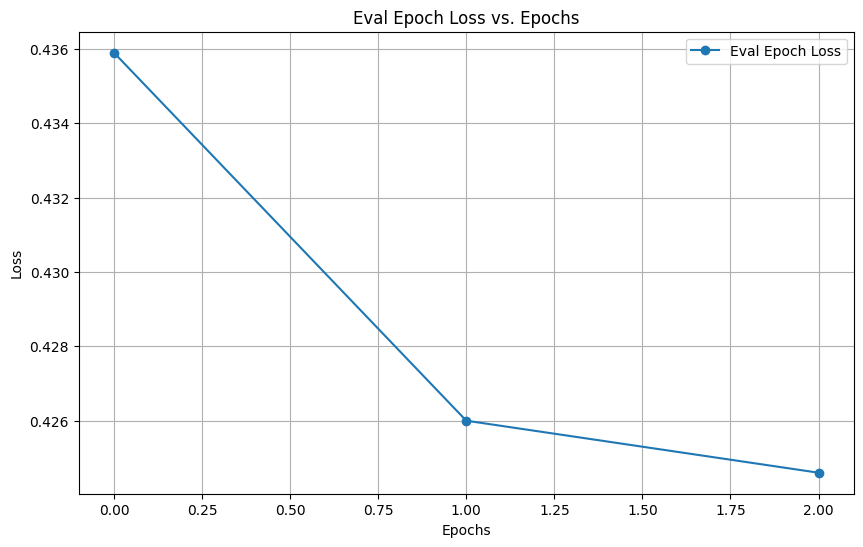

In [11]:
# Plotting eval epoch loss
epochs = list(parsed_data.keys())
eval_losses = [epoch_data['eval_epoch_loss'] for epoch_data in parsed_data.values()]

plt.figure(figsize=(10, 6))
plt.plot(epochs, eval_losses, marker='o', label='Eval Epoch Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Eval Epoch Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

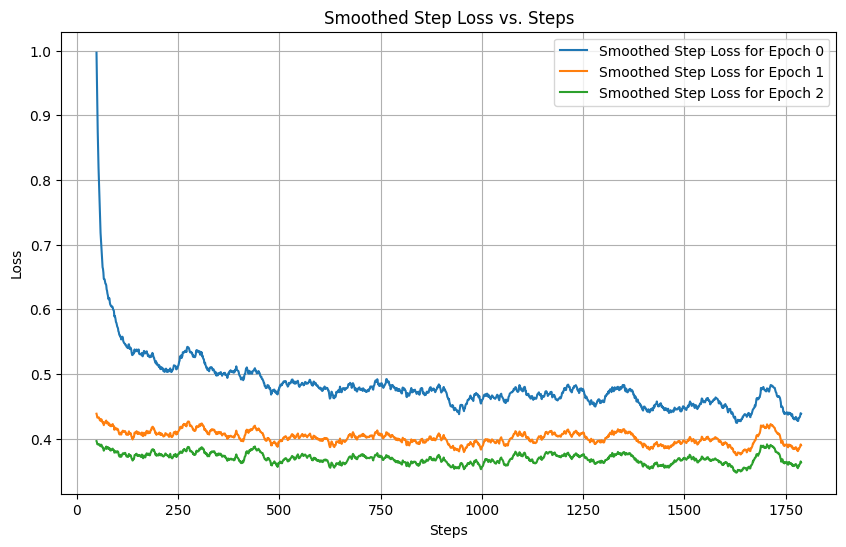

In [12]:
window_size = 50  # Adjust this based on your data
epochs_to_plot = [0, 1, 2]

# Setting up the plot
plt.figure(figsize=(10, 6))

# Iterate over each epoch to plot
for epoch in epochs_to_plot:
    steps = list(parsed_data[epoch]['steps'].keys())
    step_losses = list(parsed_data[epoch]['steps'].values())
    
    smoothed_step_losses = SQLTuner.moving_average(step_losses, window_size)
    smoothed_steps = steps[window_size - 1:]  # Adjust steps to match the length of smoothed_step_losses
    
    plt.plot(smoothed_steps, smoothed_step_losses, label=f'Smoothed Step Loss for Epoch {epoch}')

# Customizing and showing the plot
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Smoothed Step Loss vs. Steps')
plt.legend()
plt.grid(True)
plt.show()
